In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# generating data
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5 * x**2 + x +2 + np.random.randn(m,1)

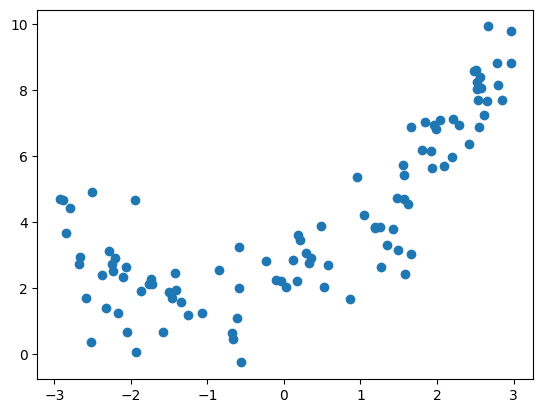

In [3]:
plt.scatter(x=x,y=y)
plt.show()

In [16]:
model = sk.preprocessing.PolynomialFeatures(degree=2,include_bias=False)

In [17]:
x_poly = model.fit_transform(x)

In [18]:
print(x[0])
print(x_poly[0])

[-2.66240056]
[-2.66240056  7.08837674]


In [7]:
lr = sk.linear_model.LinearRegression()
lr_poly = sk.linear_model.LinearRegression()

In [8]:
lr.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
lr_poly.fit(x_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
intercept = lr.intercept_
coef = lr.coef_

In [11]:
print(intercept,coef)

[3.88554247] [[1.01558736]]


In [12]:
pred = coef*x+intercept

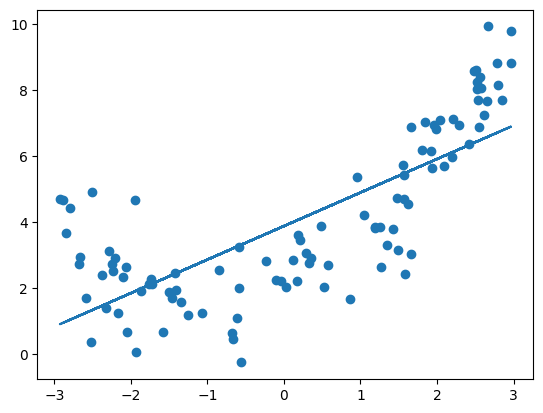

In [13]:
# ploting every thing
plt.scatter(x=x,y=y)
plt.plot(x,pred)

In [21]:
lr_poly.fit(x_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
pred_poly = lr_poly.predict(x_poly)

In [32]:
x2 = x.reshape(-1)
y2 = pred_poly.reshape(-1)

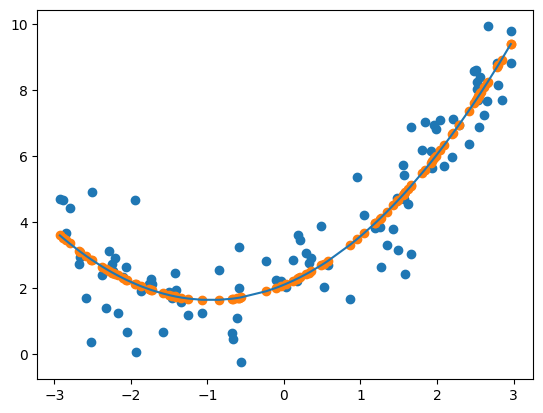

In [39]:
plt.scatter(x,y)
idx = np.argsort(x2)
plt.scatter(x2, y2)
plt.plot(x[idx], pred_poly[idx])


In [42]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(sk.metrics.mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(sk.metrics.mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

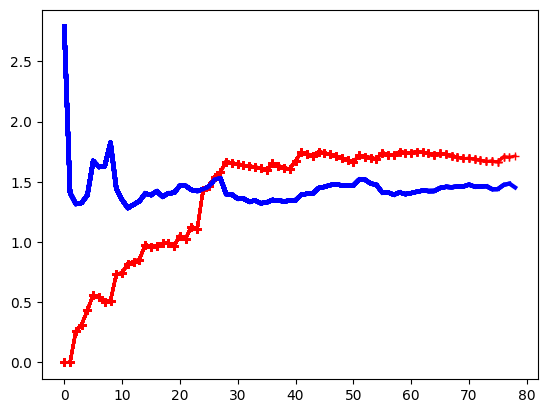

In [43]:
plot_learning_curves(lr,x,y)